# Unsupervised Machine Learning - Clustering, Part 2

## This script contains the following points:
### 01. Importing libraries
### 02. Importing Data
### 03. Data prep for the analysis
### 04. The Elbow Technique
### 05. Agglomerative Clustering

## 01. Importing libraries

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

## 02. Importing Data

In [4]:
# Define path
path = r'C:\Users\Sanja\Documents\11-2023 Water Loss Project'

In [5]:
#Import dataset
df_pipelines_failure = pd.read_excel(os.path.join(path, '02 Data', 'Prepared Data', 'pipes_failures_final.xlsx'), index_col = False)

In [6]:
df_pipelines_failure.columns

Index(['Unnamed: 0', 'pipe_age_2013', 'length', 'diameter', 'material',
       'soil_consistency', 'soil_aggressivity', 'groundwater', 'traffic_load',
       'stray_electricity', 'cause_of_damage', 'failure_occurred_on_pipe'],
      dtype='object')

In [7]:
df_pipelines_failure.head(5)

,Unnamed: 0,pipe_age_2013,length,diameter,material,soil_consistency,soil_aggressivity,groundwater,traffic_load,stray_electricity,cause_of_damage,failure_occurred_on_pipe
0,0,NaN,0.177445,600.0,4,4,3,1.0,1,4,NaN,0
1,1,NaN,0.143000,600.0,4,4,3,1.0,1,3,NaN,0
2,2,NaN,0.143000,600.0,4,4,3,1.0,1,3,NaN,0
3,3,NaN,0.185747,600.0,4,4,3,1.0,1,4,NaN,0
4,4,NaN,0.143000,600.0,4,4,3,1.0,1,3,NaN,0


##  03. Data prep for the analysis

In [8]:
selected_columns_1 = ['pipe_age_2013', 'length', 'diameter', 'material',
       'soil_consistency', 'soil_aggressivity', 'traffic_load',
       'stray_electricity', 'failure_occurred_on_pipe']

In [9]:
df_all = df_pipelines_failure[selected_columns_1]

In [10]:
# Missing values
df_all.isnull().sum()

pipe_age_2013               5493
length                         0
diameter                     142
material                       0
soil_consistency               0
soil_aggressivity              0
traffic_load                   0
stray_electricity              0
failure_occurred_on_pipe       0
dtype: int64

In [11]:
# Drop rows with missing values
df_numerical_no_nan_1 = df_all.dropna()

# Display the resulting DataFrame
print(df_numerical_no_nan_1)

       pipe_age_2013     length  diameter  material  soil_consistency  \
12              36.0   0.850000     500.0         3                 0   
14               9.0   2.503001     500.0         3                 4   
15              36.0   5.169915     500.0         3                 0   
16              24.0  64.949526     500.0         3                 4   
17              50.0  10.940000     500.0         2                 5   
...              ...        ...       ...       ...               ...   
79199            3.0   1.600000      25.0         8                 1   
79200            2.0   6.342000      25.0         8                 1   
79201            7.0   0.286000      25.0         8                 1   
79202            1.0   4.328000      25.0         8                 3   
79203            1.0   4.938000      25.0         8                 1   

       soil_aggressivity  traffic_load  stray_electricity  \
12                     4             2                  4   
1

In [12]:
# Standardize the data
df_scaler_1 = StandardScaler().fit_transform(df_numerical_no_nan_1)

In [13]:
df_scaler_1

array([[ 0.30610695, -0.3491876 ,  6.02964393, ...,  0.41261197,
         0.60042437, -0.17195669],
       [-1.07665185, -0.2862935 ,  6.02964393, ..., -0.86535993,
         0.60042437, -0.17195669],
       [ 0.30610695, -0.18482156,  6.02964393, ..., -0.86535993,
         0.60042437, -0.17195669],
       ...,
       [-1.17907843, -0.37064692, -0.9798436 , ...,  0.41261197,
         0.60042437, -0.17195669],
       [-1.48635817, -0.21685513, -0.9798436 , ..., -0.86535993,
        -2.23302512, -0.17195669],
       [-1.48635817, -0.19364558, -0.9798436 , ..., -0.86535993,
         0.60042437, -0.17195669]])

## 04. The Elbow Technique

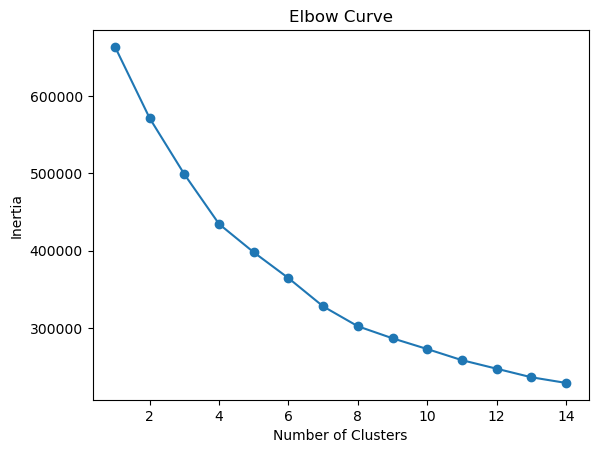

In [14]:
# Define the range of potential clusters in the data
k_values = range(1, 15)

# Initialize an empty list to store the inertia for each k
inertia_values = []

# Perform K-Means clustering for each value of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Set n_init explicitly
    kmeans.fit(df_scaler_1)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

#### Observation:   In this instance, the optimal number of clusters appears to be 6.

## 05. Agglomerative Clustering

In [17]:
# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=6, linkage='ward')
#agg_clustering = AgglomerativeClustering(n_clusters=6, linkage='single')
cluster_labels = agg_clustering.fit_predict(df_scaler_1)

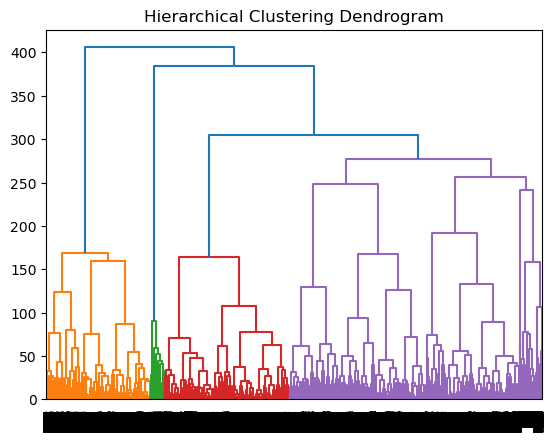

In [18]:
# Visualize the hierarchical clustering dendrogram
linkage_matrix = linkage(df_scaler_1, method='ward')
#linkage_matrix = linkage(df_scaler_1, method='single')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.savefig('Hierarchical Clustering Dendrogram')
plt.show()

In [19]:
# Print the number of samples in each cluster
print(pd.Series(cluster_labels).value_counts())

0    20265
3    18551
4    15497
2    13998
1     3304
5     2097
Name: count, dtype: int64


In [20]:
# Explore the characteristics of each cluster
cluster_means = pd.DataFrame(df_scaler_1).groupby(cluster_labels).mean()
print(cluster_means)

          0         1         2         3         4         5         6  \
0  0.191712 -0.195038 -0.148875 -0.402641 -0.513798  0.683203  0.385432   
1  0.435411  1.443161  2.794029 -0.730523 -0.155359  0.504748 -0.054250   
2  0.583178 -0.017633 -0.097054 -0.545854  1.026485  0.462258 -0.215327   
3  0.125294 -0.072979 -0.126976 -0.388972 -0.306632 -1.076353 -0.211873   
4 -1.109197 -0.036122 -0.197690  1.688536  0.142161 -0.133094 -0.028910   
5  0.657102  0.641248  0.268568 -0.351635  0.020005  0.022183 -0.113934   

          7         8  
0 -0.796656 -0.171957  
1 -0.150817 -0.135714  
2  0.451445 -0.171957  
3  0.484394 -0.171957  
4  0.068974 -0.171957  
5  0.127958  5.815418  


In [21]:
# Concatenate the cluster labels with your original data
df_with_clusters_1 = pd.concat([pd.DataFrame(df_scaler_1), pd.Series(cluster_labels, name='clusters')], axis=1)
# Get back the original columns names
df_with_clusters_1.columns = df_all.columns.tolist() + ['clusters']
# Display the head of the DataFrame
print(df_with_clusters_1.head())

   pipe_age_2013    length  diameter  material  soil_consistency  \
0       0.306107 -0.349188  6.029644 -0.768860         -1.097865   
1      -1.076652 -0.286294  6.029644 -0.768860          1.207123   
2       0.306107 -0.184822  6.029644 -0.768860         -1.097865   
3      -0.308453  2.089699  6.029644 -0.768860          1.207123   
4       1.023093  0.034721  6.029644 -1.257915          1.783370   

   soil_aggressivity  traffic_load  stray_electricity  \
0           1.312371      0.412612           0.600424   
1          -0.267958     -0.865360           0.600424   
2           1.312371     -0.865360           0.600424   
3           0.522206     -0.865360           0.600424   
4           0.522206     -0.865360          -2.233025   

   failure_occurred_on_pipe  clusters  
0                 -0.171957         1  
1                 -0.171957         1  
2                 -0.171957         1  
3                 -0.171957         1  
4                 -0.171957         1  


###  Visualization of the clusters

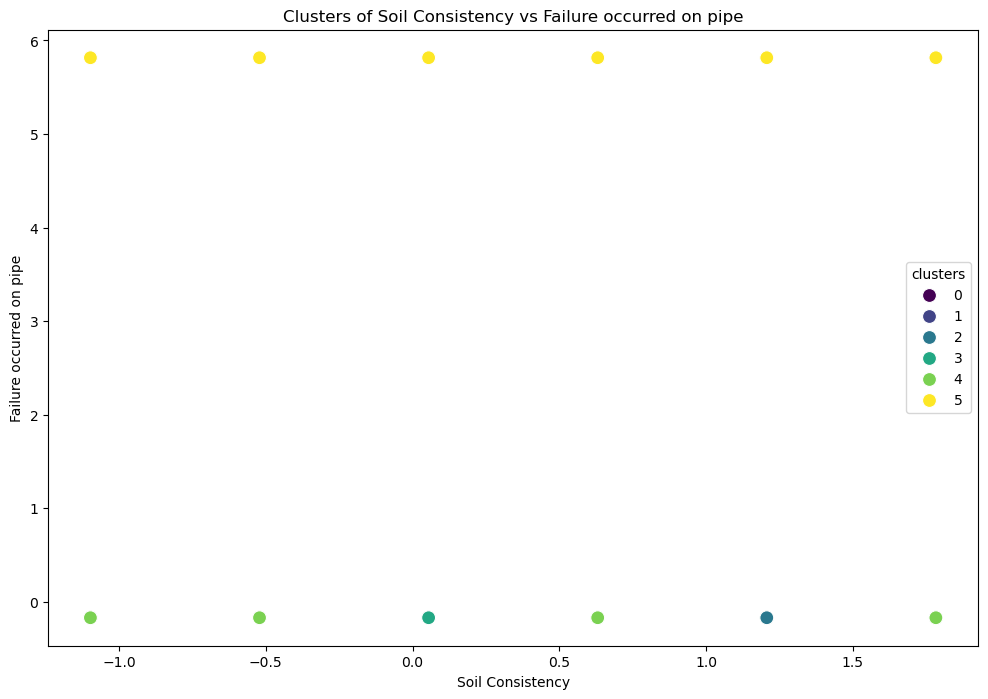

In [22]:
# Plot the clusters for the "soil_consistency" and "failure_occurred_on_pipe" variables.
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_with_clusters_1['soil_consistency'], y=df_with_clusters_1['failure_occurred_on_pipe'], hue=df_with_clusters_1['clusters'], palette='viridis', s=100)
plt.title('Clusters of Soil Consistency vs Failure occurred on pipe')
plt.xlabel('Soil Consistency')
plt.ylabel('Failure occurred on pipe')
plt.savefig('Hierarchical Clustering Dendrogram')
plt.show()

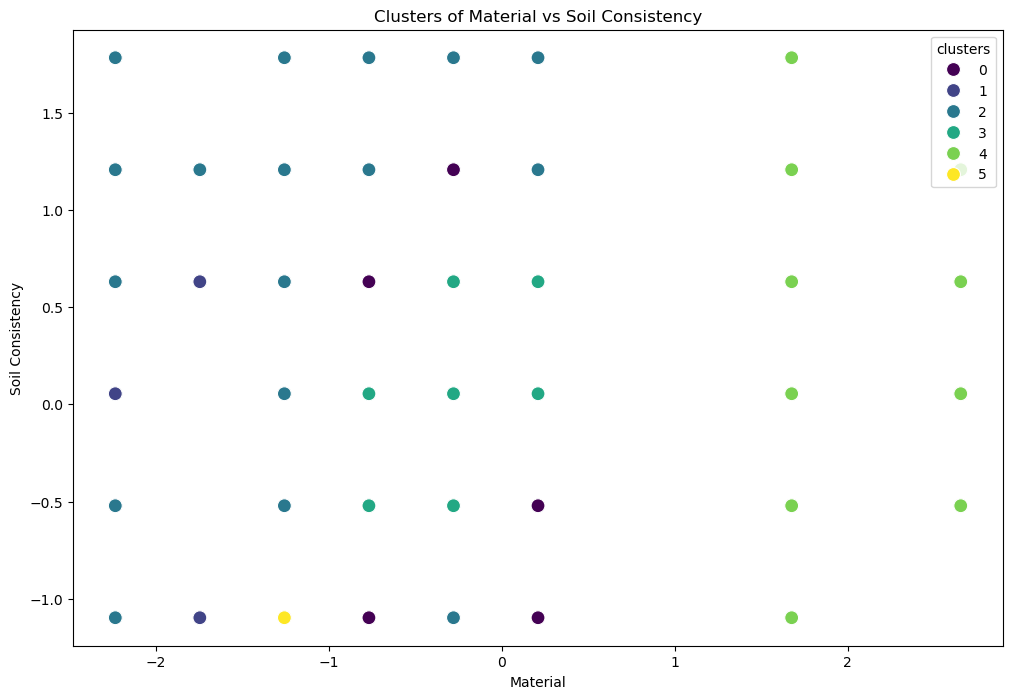

In [23]:
# Plot the clusters for the "material" and "soil_consistency" variables.
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_with_clusters_1['material'], y=df_with_clusters_1['soil_consistency'], hue=df_with_clusters_1['clusters'], palette='viridis', s=100)
plt.title('Clusters of Material vs Soil Consistency')
plt.xlabel('Material')
plt.ylabel('Soil Consistency')
plt.show()

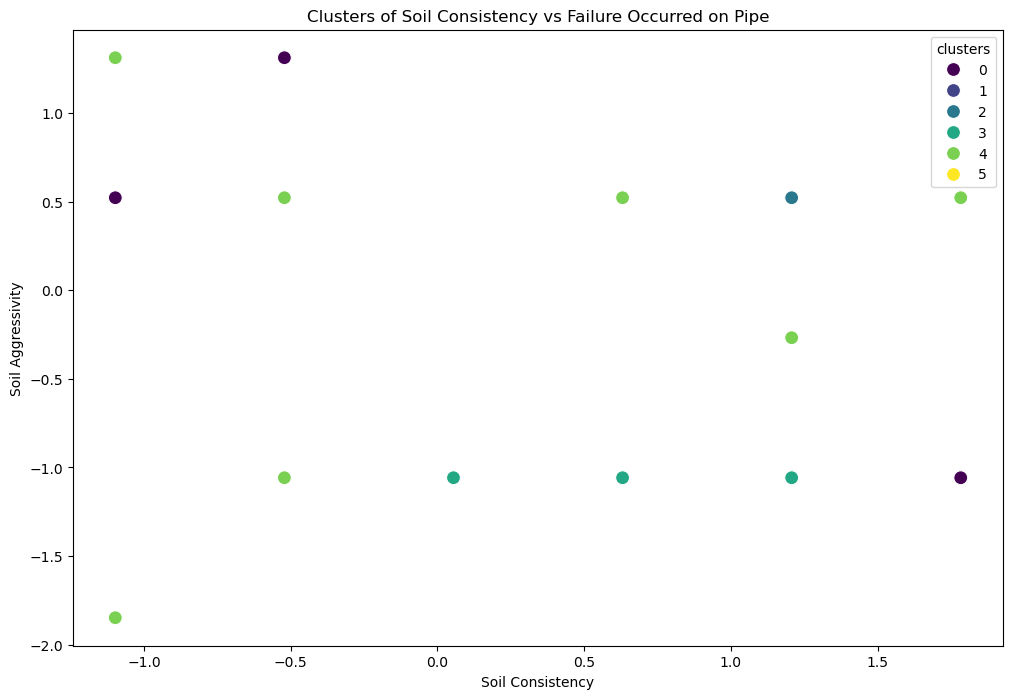

In [24]:
# Plot the clusters for the "soil_consistency" and "soil_aggressivity" variables.
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df_with_clusters_1['soil_consistency'], y=df_with_clusters_1['soil_aggressivity'], hue=df_with_clusters_1['clusters'], palette='viridis', s=100)
plt.title('Clusters of Soil Consistency vs Failure Occurred on Pipe')
plt.xlabel('Soil Consistency')
plt.ylabel('Soil Aggressivity')
plt.show()

### Conclusion: Through the application of Agglomerative Clustering, I can reiterate my previous finding that, given the data's nature, clustering algorithms may not be the most suitable method for capturing meaningful relationships aligned with the project objectives. 
### Considering the requisite data input and potential output, it appears that the Linear Extension of the Yule Process (LEYP) model could be a more suitable choice for further exploration. In this approach, the LEYP intensity function is formulated to encompass multiplicative effects, accounting for past failures with the Yule factor (1+αN(t-)), aging through the Weibull factor δt^(δ-1), and covariates characterizing the pipe and its environment with the Cox factor e^(z^T β).
